PCA Exercise (Core)
Task
Your task is to perform PCA to speed up a classification algorithm on a high-dimensional dataset.  You will fit a model on the original scaled data, and a different one on data after transformation using a PCA model.  You will compare the computation time and the evaluation scores.



We will use the MNIST digits dataset, which comes pre-installed in sklearn. This dataset has 28x28 pixel images of handwritten digits 0-9. Your task is to classify these to determine which digits they are.

Use PCA to lower the dimensions in this dataset while `retaining 95% of the variance. ` You can do this when instantiating the PCA by giving the `n_components=` argument a float between 0 and 1.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, \
plot_confusion_matrix, accuracy_score

# 2. Load Data

In [ ]:
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

# 3. Prepare dataset for machine learning



In [ ]:
scaler = StandardScaler()
pca = PCA(n_components= .95)

pca_preprocessing = make_pipeline(scaler, pca)

In [ ]:
print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', pca_preprocessing.fit_transform(X_train).shape)
print('Column count difference:', X_train.shape[1]- pca_preprocessing.fit_transform(X_train).shape[1])

Shape before PCA: (60000, 784)
Shape after PCA: (60000, 331)
Column count difference: 453


# 4. Modelling with KNN ⭕

In [ ]:
def model_report(model,X_train, X_test,y_train, y_test,cmap='Blues',
                 normalize = None,
                 classes = None,
                 figsize = (20,5)):

  print('Train Report:', classification_report(y_train,model.predict(X_train), target_names = classes))
  print('Test Report:', classification_report(y_test,model.predict(X_test), target_names = classes))
  ax = plt.subplot()
  ConfusionMatrixDisplay.from_estimator(model,X_test, y_test, cmap=cmap,
                                             display_labels=classes,
                                             normalize = normalize,ax=ax)
  ax.set_title(f'Confusion Matrix for {model}')
  ax.grid(False)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

### a. With PCA transformed data

In [ ]:
# Instantiate the model
knn = KNeighborsClassifier()

In [ ]:
%%time
# Pipeline
knn_pca = make_pipeline(scaler,pca,knn)

# Fit pipeline
knn_pca.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

Model Evaluation

Train Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.97      0.99      0.98      6742
           2       0.97      0.97      0.97      5958
           3       0.96      0.97      0.96      6131
           4       0.97      0.96      0.97      5842
           5       0.96      0.96      0.96      5421
           6       0.97      0.98      0.98      5918
           7       0.96      0.96      0.96      6265
           8       0.98      0.94      0.96      5851
           9       0.95      0.96      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

Test Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.94      0.95      10

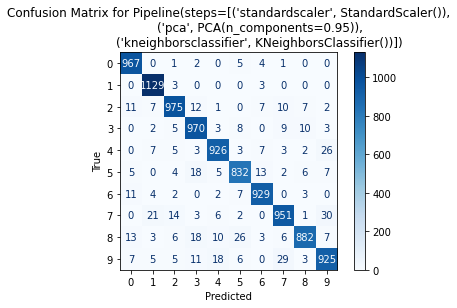

CPU times: user 4min 52s, sys: 6.29 s, total: 4min 58s
Wall time: 3min 21s


In [ ]:
%%time
model_report(knn_pca, X_train,X_test, y_train, y_test)

### b. Without PCA transformation

In [ ]:
%%time
# Pipeline with model
knn_pipe = make_pipeline(scaler,knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Model Evaluation

Train Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5923
           1       0.97      0.99      0.98      6742
           2       0.97      0.96      0.96      5958
           3       0.95      0.97      0.96      6131
           4       0.97      0.95      0.96      5842
           5       0.96      0.95      0.95      5421
           6       0.97      0.98      0.98      5918
           7       0.96      0.96      0.96      6265
           8       0.98      0.93      0.95      5851
           9       0.94      0.95      0.95      5949

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000

Test Report:               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      10

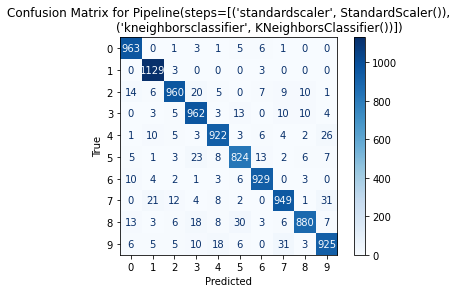

CPU times: user 9min, sys: 8.77 s, total: 9min 9s
Wall time: 5min 30s


In [ ]:
%%time
model_report(knn_pipe, X_train,X_test, y_train, y_test)

### 5. Analysis on Speed & Accuracy of models 

> - With PCA transformed data, it took almost 40% less time
> - PCA transformed model performed slightly better at 95% compared to 94% on the test data 



### Tuned KNN Model

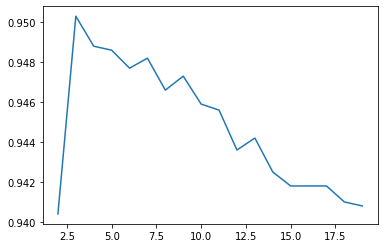

In [38]:
ks = range(2,20)

accuracies = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)

  knn_pca_pipe = make_pipeline(scaler, pca, knn) # preprocessing + pca + model
  knn_pca_pipe.fit(X_train,y_train) # fit pipe on train set

  accuracies.append(knn_pca_pipe.score(X_test,y_test))

plt.plot(ks, accuracies)

#### With PCA

Train Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.97      0.97      0.97      5958
           3       0.97      0.97      0.97      6131
           4       0.98      0.97      0.97      5842
           5       0.97      0.96      0.97      5421
           6       0.98      0.99      0.98      5918
           7       0.97      0.97      0.97      6265
           8       0.99      0.95      0.97      5851
           9       0.96      0.97      0.96      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.97      0.97     60000
weighted avg       0.98      0.98      0.98     60000

Test Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.95      0.95      10

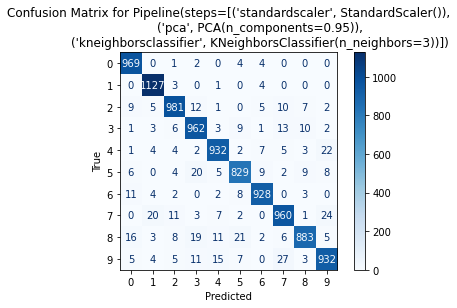

CPU times: user 4min 40s, sys: 9.45 s, total: 4min 49s
Wall time: 3min


In [39]:
%%time
knn=KNeighborsClassifier(n_neighbors=3)
knn_pca_pipe = make_pipeline(scaler, pca, knn)

knn_pca_pipe.fit(X_train,y_train)

model_report(knn_pca_pipe, X_train, X_test, y_train, y_test)

#### No PCA

Train Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.97      0.99      0.98      6742
           2       0.97      0.97      0.97      5958
           3       0.96      0.97      0.97      6131
           4       0.98      0.96      0.97      5842
           5       0.97      0.96      0.97      5421
           6       0.98      0.99      0.98      5918
           7       0.97      0.97      0.97      6265
           8       0.99      0.94      0.97      5851
           9       0.96      0.96      0.96      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

Test Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      10

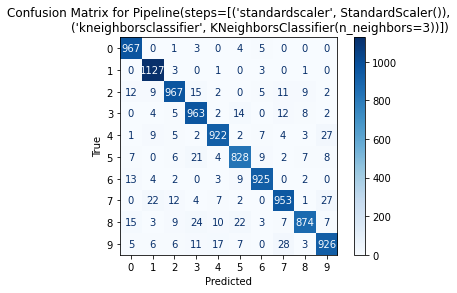

CPU times: user 8min 49s, sys: 13.5 s, total: 9min 2s
Wall time: 5min 19s


In [40]:
%%time
knn=KNeighborsClassifier(n_neighbors=3)
knn_pipe2 = make_pipeline(scaler,knn)

knn_pipe2.fit(X_train,y_train)

model_report(knn_pipe2, X_train, X_test, y_train, y_test)

### Tuned KNN Model using GridSearch

In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [37]:
GridSearchCV,
# Tune with selected parameter with GridSearchCV
knn_param = {'kneighborsclassifier__n_neighbors': range(1,20),
             'kneighborsclassifier__p': range(1,5),
             'kneighborsclassifier__weights': ['distance','uniform']}

gs_knn = GridSearchCV(knn_pipe,knn_param)

In [36]:
gs_knn.fit(X_train,y_train)

KeyboardInterrupt: ignored

Didnt finish execution even after 2 hrs 😯 😆

In [ ]:
model_report(gs_knn, X_train,X_test, y_train, y_test)